In [1]:
#importing useful libraries and modules
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio

from numpy import sqrt, pi, exp, transpose, matmul
from numpy.linalg import det, inv

%matplotlib inline

Reading in coloured images and their corresponding binary image masks and displaying them.

In [2]:
import glob

#coloured images
files = glob.glob("apples/*.jpg")

ColorImgs = []

for myFile in files:
    im = plt.imread(myFile)
    ColorImgs.append(im/255)

#binary masks
files = glob.glob("apples/*.png")
BinImgs = []
for myFile in files:
    im = plt.imread(myFile)
    BinImgs.append(im)

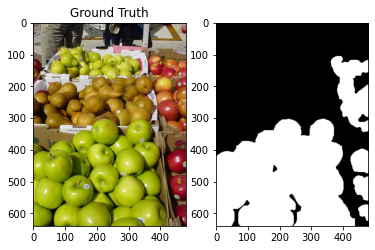

In [3]:
# display the test image and the ground truth mask
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ColorImgs[0])
ax1.set_title('Image')
ax2.imshow(BinImgs[0])
ax1.set_title('Ground Truth')
plt.show()

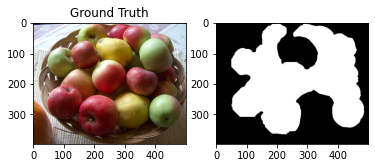

In [4]:
# display the test image and the ground truth mask
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ColorImgs[1])
ax1.set_title('Image')
ax2.imshow(BinImgs[1])
ax1.set_title('Ground Truth')
plt.show()

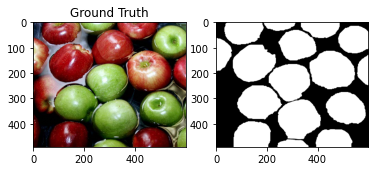

In [5]:
# display the test image and the ground truth mask
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ColorImgs[2])
ax1.set_title('Image')
ax2.imshow(BinImgs[2])
ax1.set_title('Ground Truth')
plt.show()

# B)  Use mixtures of Gaussians to distinguish apple vs. non-apple pixels.
 Use red, green, and
blue as your dimensions for now. Make any other decisions you need to, and document them
in your .ipynb notebook.


In [6]:

print(np.asarray(ColorImgs[0]).shape)
print(np.asarray(ColorImgs[1]).shape)
print(np.asarray(ColorImgs[2]).shape)
print(np.asarray(BinImgs[0]).shape)
print(np.asarray(BinImgs[1]).shape)
print(np.asarray(BinImgs[2]).shape)

(640, 480, 3)
(397, 500, 3)
(491, 600, 3)
(640, 480, 4)
(397, 500, 4)
(491, 600, 3)


BinImgs[0] and BinImgs[1] seem to have 4 colour channels instead of 3. I suspect they're in the RGBA format instead of RGB so I'll simply be dropping their 4th column A as the transparency A is always set to 1 anyway.

In [7]:
#dropping column A for 2 of the binary masks to convert from RGBA to RGB
#I'm also making sure to take the average of the 3 RGB values at each pixel and thresholding to make sure we actually have binary 0 and 1 values. The threshold I chose is 0.99
image = BinImgs[0]
image = image[:,:,:-1]
BinImgs[0] = np.mean(image, axis=2)

image = BinImgs[1]
image = image[:,:,:-1]
BinImgs[1] = np.mean(image, axis=2)


image = BinImgs[2]
BinImgs[2] = np.mean(image, axis=2)

We now create the training data

In [8]:
#creating training data by vectorising the pixel dimensions of each image and concatenating them together (so that we have an array where each column is a different pixels and the 3 rows are the RGB channels)
trainingData = np.concatenate((ColorImgs[0].reshape(3,-1), ColorImgs[1].reshape(3,-1), ColorImgs[2].reshape(3,-1)), axis=1)
#and we do the same with the binary masks. But remember we dropped the 3 RGB in favour of their mean
trainingDataMasks = np.concatenate((BinImgs[0].reshape(1,-1), BinImgs[1].reshape(1,-1), BinImgs[2].reshape(1,-1)), axis=1)

#we can now separate our training data into apple pixels and non-apple pixels by looking at the binary mask values
RGB_Apples = trainingData[:,np.all(trainingDataMasks>0.5, axis=0)]
RGB_Non_Apples =trainingData[:,np.all(trainingDataMasks<0.5, axis=0)]

In [9]:
def fitGaussianModel(data):    
    """
    Returns the mean and covariance for a set of multidimensaional data.  
    It is assumed that each column of the 2D array, data, contains a single data point.  
    The mean vector should be a dx1 vector with the mean value of the data. For this lab, the output is a 
    3 by 1 vector containing the RGB mean of the input pixels. The covariance should be a dxd covariance
    matrix. See the note at the top, which explains that using mean() is ok,
    but please compute the covariance yourself.
    
    Keyword arguments:
    data -- d by n matrix of data points. d is the number of dimensions and n is the number of data points.
    
    Returns: 
    meanData -- d by 1 vector containing the mean value of the input data.
    covData -- d by d matrix containing the covariance of the input data.
    """

    nDim,nData = data.shape
    
    #calculate mean of data.  You can do this using the numpy command 'mean'
    meanData = np.mean(data, 1, keepdims=True, dtype=np.float64);
    
    #calculate covariance of data.  You should do this yourself to ensure you
    #understand how.  Check you have the right answer by comparing with the
    #numpy function np.cov().
    covData = np.matmul(data - meanData, np.transpose(data - meanData))/(nData-1);
    

    return meanData,covData

In [10]:
#fit Gaussian model for apple data
meanApple, covApple = fitGaussianModel(RGB_Apples)

#fit Gaussian model for non-apple data
meanNonApple, covNonApple = fitGaussianModel(RGB_Non_Apples)

In [11]:
#the goal of this routine is to evaluate a Gaussian likelihood
def calcGaussianProb(data,gaussMean,gaussCov):
    """
    Returns the likelihood that each data point in data belongs to the Gaussian described by gaussMean and 
    gaussCov.
    
    Keyword arguments:
    data -- d by n matrix of data points. d is the number of dimensions and n is the number of data points.
    gaussMean -- d by 1 vector containing the mean parameter of the Gaussian distribution.
    gaussCov -- d by d matrix containing the covariance parameters of the Gaussian distribution.
    
    Returns: 
    like -- 1 by n vector contianing the likelihood that each data point in data belongs to the Gaussian 
    distribution defined by gaussMean and gaussCov.
    """
    nDim,nData = data.shape
    
    #TO DO (b) - fill in this routine, replace the placeholders for like with the actual equation.
        
    #replace this
    #like = (1/(2*pi)**(0.5*nDim)) * ((np.linalg.det(gaussCov))**-0.5)  * exp(np.expand_dims((-0.5*np.transpose(data - gaussMean)@ np.linalg.inv(gaussCov) @ (data - gaussMean)).diagonal(), axis=0)) 
    #initially I passed the whole data matrix and vectorised the diagonal using .diagonal() as the n entries in the diagonal contained exactly what I needed. expand_dims ensured we get a 1 by n array. This was
    # too slow as we were doing unnecessary matrix multiplications. The below version is more efficient as it only computes what's needed 
    like = (1/(2*pi)**(0.5*nDim)) * ((np.linalg.det(gaussCov))**-0.5)  * exp(np.sum(np.transpose(-0.5*np.transpose(data - gaussMean)@ np.linalg.inv(gaussCov)) * (data - gaussMean), axis=0));

    
    return like

In [12]:
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior
im = ColorImgs[0]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK
likeApple_vectorised = calcGaussianProb(vectorised_pixel_rgb_triplets,meanApple,covApple);
likeNonApple_vectorised = calcGaussianProb(vectorised_pixel_rgb_triplets,meanNonApple,covNonApple);
posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))

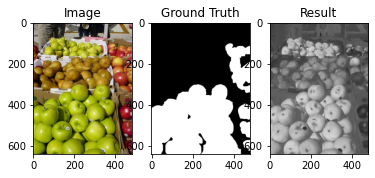

In [13]:
# set up plots.
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
#show the image
ax1.imshow(im)
ax1.set_title('Image')
#show the ground truth mask
ax2.imshow(BinImgs[0], cmap='gray')
ax2.set_title('Ground Truth')
#show our prediction!
ax3.imshow(posteriorApple, cmap='gray')
ax3.set_title('Result')
plt.show()

In [14]:
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior
im = ColorImgs[1]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK
likeApple_vectorised = calcGaussianProb(vectorised_pixel_rgb_triplets,meanApple,covApple);
likeNonApple_vectorised = calcGaussianProb(vectorised_pixel_rgb_triplets,meanNonApple,covNonApple);
posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))

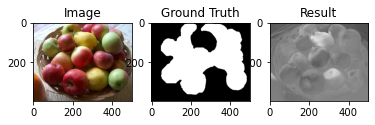

In [15]:
# set up plots.
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
#show the image
ax1.imshow(im)
ax1.set_title('Image')
#show the ground truth mask
ax2.imshow(BinImgs[1], cmap='gray')
ax2.set_title('Ground Truth')
#show our prediction!
ax3.imshow(posteriorApple, cmap='gray')
ax3.set_title('Result')
plt.show()

In [16]:
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior
im = ColorImgs[2]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK
likeApple_vectorised = calcGaussianProb(vectorised_pixel_rgb_triplets,meanApple,covApple);
likeNonApple_vectorised = calcGaussianProb(vectorised_pixel_rgb_triplets,meanNonApple,covNonApple);
posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))

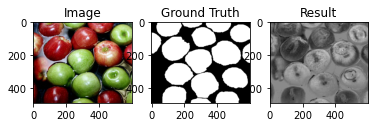

In [17]:
# set up plots.
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
#show the image
ax1.imshow(im)
ax1.set_title('Image')
#show the ground truth mask
ax2.imshow(BinImgs[2], cmap='gray')
ax2.set_title('Ground Truth')
#show our prediction!
ax3.imshow(posteriorApple, cmap='gray')
ax3.set_title('Result')
plt.show()

As we can see our current model performs very poorly and is only able to find green apples and struggles with the red apples. To make our model better, I'm going to train a mixture of gaussian models with 2 gaussians on our apple pixels and another mixture of 4 on the non-apple pixels, so that we can model the different types of apples and non-apple objects a bit better. I'm using 2 for apples because I can see that the dataset has green and red apples and I'm using 4 for non-apples so that we have more flexibility when modelling all the varying types of non-apple objects.
Furthermore, having been trained on red and greens together, the current model gets very confused by yellow and brown colours (red+green=yellow).

In [18]:

def getMixGaussLogLike(data, mixGaussEst): 
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    
    """
    
    data = np.atleast_2d(data)                                                                         
    # find total number of data items                                                                  
    nDims, nData = data.shape                                                                          
    
    # initialize log likelihoods                                                                       
    logLike = 0;                                                                                       
                                                                                                       
    # run through each data item                                                                       
    for cData in range(nData):                                                                         
        thisData = data[:, [cData]]                                                                      
        # TO DO (i)- calculate likelihood of this data point under mixture of                         
        # Gaussians model. Replace this  
        prob = (np.einsum('ij,jki->ki', (thisData-mixGaussEst['mean']).T, (np.linalg.inv(mixGaussEst['cov'].T)).T));
        prob = (np.sum(prob*(thisData-mixGaussEst['mean']),axis=0, keepdims=True));
        prob = np.exp(-0.5*prob);
        prob = prob/((np.sqrt(2*np.pi)**nDims)*np.sqrt((np.linalg.det(mixGaussEst['cov'].T)).T));
        like = prob@mixGaussEst['weight'] ;                                                              
        
        # add to total log like                                                                        
        logLike = logLike + np.log(like)                                                               
                                                                                                       
    return  np.asscalar(logLike)                                                                       

def fitMixGauss(data, k, iterations):
    """
    Estimate a k MoG model that would fit the data. Incremently plots the outcome.
               
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    """
    
    #     MAIN E-M ROUTINE  
    #     In the E-M algorithm, we calculate a complete posterior distribution over                                  
    #     the (nData) hidden variables in the E-Step.  
    #     In the M-Step, we update the parameters of the Gaussians (mean, cov, w).   
    
    nDims, nData = data.shape


    postHidden = np.zeros(shape=(k, nData))

    # we will initialize the values to random values
    mixGaussEst = dict()
    mixGaussEst['d'] = nDims
    mixGaussEst['k'] = k
    mixGaussEst['weight'] = (1 / k) * np.ones(shape=(k))
    mixGaussEst['mean'] = 2 * np.random.randn(nDims, k)
    mixGaussEst['cov'] = np.zeros(shape=(nDims, nDims, k))
    for cGauss in range(k):
        mixGaussEst['cov'][:, :, cGauss] = 2.5 + 1.5 * np.random.uniform() * np.eye(nDims)
        

    # calculate current likelihood
    # TO DO (j) starts here - fill in this routine
    logLike = getMixGaussLogLike(data, mixGaussEst)
    print('Log Likelihood Iter 0 : {:4.3f}\n'.format(logLike))

    nIter = iterations;

    logLikeVec = np.zeros(shape=(2 * nIter))
    boundVec = np.zeros(shape=(2 * nIter))

    

    for cIter in range(nIter):

        # ===================== =====================
        # Expectation step
        # ===================== =====================

        for cData in range(nData):
            # TO DO : fill in column of 'hidden' - calculate posterior probability that
            # this data point came from each of the Gaussians
            # replace this:
            thisData = data[:, [cData]]
            prob = (np.einsum('ij,jki->ki', (thisData-mixGaussEst['mean']).T, (np.linalg.inv(mixGaussEst['cov'].T)).T));
            prob = (np.sum(prob*(thisData-mixGaussEst['mean']),axis=0, keepdims=True));
            prob = np.exp(-0.5*prob);
            prob = prob/((np.sqrt(2*np.pi)**nDims)*np.sqrt((np.linalg.det(mixGaussEst['cov'].T)).T));
            postHidden[:, [cData]] = prob.T
        responsibilities = np.array([mixGaussEst['weight']]).T * postHidden
        responsibilities = responsibilities/np.sum(responsibilities, axis=0) #responsibilities introduced as they're easy to work with. Not strictly necessary

        # ===================== =====================
        # Maximization Step
        # ===================== =====================
        # for each constituent Gaussian
        #realised the below 3 assignments could be carried out outside the for loop by vectorising, making the code more efficient
        mixGaussEst['weight'] = (np.sum(responsibilities, axis=1))/np.sum(responsibilities)
        temp = data@responsibilities.T/np.sum(responsibilities, axis=1)
        mixGaussEst['mean'] = temp
        for cGauss in range(k):
            # TO DO :  Update weighting parameters mixGauss.weight based on the total
            # posterior probability associated with each Gaussian. Replace this:
            #mixGaussEst['weight'][cGauss] = (np.sum(responsibilities, axis=1))[cGauss]/np.sum(responsibilities)
            
            
            
            # TO DO :  Update mean parameters mixGauss.mean by weighted average
            # where weights are given by posterior probability associated with
            # Gaussian.  Replace this:
            #temp = data@responsibilities.T/np.sum(responsibilities, axis=1)
            #mixGaussEst['mean'][:,cGauss] = temp[:,cGauss]
            
            
            # TO DO :  Update covarance parameter based on weighted average of
            # square distance from update mean, where weights are given by
            # posterior probability associated with Gaussian
            temp2 = responsibilities[[cGauss],:]*(data - mixGaussEst['mean'][:,[cGauss]])
            temp2 = temp2@(data - mixGaussEst['mean'][:,[cGauss]]).T
            mixGaussEst['cov'][:,:,cGauss] = temp2/np.sum(responsibilities[[cGauss],:])
            
            
        

        # calculate the log likelihood
        logLike = getMixGaussLogLike(data, mixGaussEst)
        print('Log Likelihood After Iter {} : {:4.3f}\n'.format(cIter, logLike))


    return mixGaussEst                     

In [19]:
#define number of components to estimate
nGaussEst = 2
np.random.seed(0)
#fit mixture of Gaussians on apples
#TO DO fill in this routine (below)
mixGaussEst = fitMixGauss(RGB_Apples,nGaussEst,14);

C:\Users\riand\AppData\Local\Temp/ipykernel_10308/101529499.py:35: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return  np.asscalar(logLike)


Log Likelihood Iter 0 : -2983812.164

Log Likelihood After Iter 0 : -189003.743

Log Likelihood After Iter 1 : -186111.391

Log Likelihood After Iter 2 : -177353.003

Log Likelihood After Iter 3 : -159764.849

Log Likelihood After Iter 4 : -141363.142

Log Likelihood After Iter 5 : -128239.323

Log Likelihood After Iter 6 : -120130.539

Log Likelihood After Iter 7 : -112795.038

Log Likelihood After Iter 8 : -102170.596

Log Likelihood After Iter 9 : -80224.757

Log Likelihood After Iter 10 : -52291.607

Log Likelihood After Iter 11 : -43666.015

Log Likelihood After Iter 12 : -42803.323

Log Likelihood After Iter 13 : -42659.214



In [20]:
#define number of components to estimate
nGaussEst2 = 4
np.random.seed(0)
#fit mixture of Gaussians on non apples
#TO DO fill in this routine (below)
mixGaussEst2 = fitMixGauss(RGB_Non_Apples,nGaussEst2,30);

C:\Users\riand\AppData\Local\Temp/ipykernel_10308/101529499.py:35: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return  np.asscalar(logLike)


Log Likelihood Iter 0 : -2712223.300

Log Likelihood After Iter 0 : -151733.015

Log Likelihood After Iter 1 : -144057.756

Log Likelihood After Iter 2 : -136463.921

Log Likelihood After Iter 3 : -127973.629

Log Likelihood After Iter 4 : -117332.977

Log Likelihood After Iter 5 : -104535.607

Log Likelihood After Iter 6 : -91992.144

Log Likelihood After Iter 7 : -83214.968

Log Likelihood After Iter 8 : -78673.327

Log Likelihood After Iter 9 : -76230.309

Log Likelihood After Iter 10 : -74381.565

Log Likelihood After Iter 11 : -72343.155

Log Likelihood After Iter 12 : -68275.610

Log Likelihood After Iter 13 : -62608.103

Log Likelihood After Iter 14 : -57794.947

Log Likelihood After Iter 15 : -52899.697

Log Likelihood After Iter 16 : -46984.533

Log Likelihood After Iter 17 : -40617.557

Log Likelihood After Iter 18 : -34226.973

Log Likelihood After Iter 19 : -27351.316

Log Likelihood After Iter 20 : -19452.620

Log Likelihood After Iter 21 : -8817.059

Log Likelihood After 

C) Download the file testApples.zip. Generate figures for your notebook, showing each
pixel’s posterior probability of being “apple.” Comment on the outcomes.

In [21]:
#test images
files = glob.glob("testApples/*.jpg")

TestImgs = []

for myFile in files:
    im = plt.imread(myFile)
    TestImgs.append(im/255) #rescaling rgb by 255

#binary masks
files = glob.glob("testApples/*.png")
BinTestImgs = []
for myFile in files:
    im = plt.imread(myFile)
    BinTestImgs.append(im)

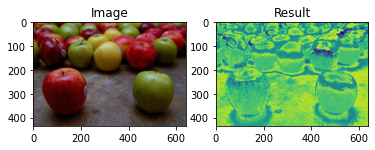

In [22]:
#first test image
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior by considering likelihoods under each gaussian component weighted by the component weights
im = TestImgs[0]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK


#2 apple gaussian components
likeApple_vectorised = mixGaussEst['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[0]],mixGaussEst['cov'][:,:,0]) + mixGaussEst['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[1]],mixGaussEst['cov'][:,:,1]); 


#4 non apple gaussian components
likeNonApple_vectorised = mixGaussEst2['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[0]],mixGaussEst2['cov'][:,:,0]) + mixGaussEst2['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[1]],mixGaussEst2['cov'][:,:,1]);
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][2]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[2]],mixGaussEst2['cov'][:,:,2])
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][3]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[3]],mixGaussEst2['cov'][:,:,3])


posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))

# set up plots.
f, (ax1, ax3) = plt.subplots(1, 2)
#show the image
ax1.imshow(im)
ax1.set_title('Image')

#show our prediction!
ax3.imshow(posteriorApple)
ax3.set_title('Result')
plt.show()

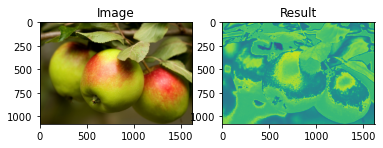

In [23]:
#second test image
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior
im = TestImgs[1]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK


likeApple_vectorised = mixGaussEst['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[0]],mixGaussEst['cov'][:,:,0]) + mixGaussEst['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[1]],mixGaussEst['cov'][:,:,1]); 


likeNonApple_vectorised = mixGaussEst2['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[0]],mixGaussEst2['cov'][:,:,0]) + mixGaussEst2['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[1]],mixGaussEst2['cov'][:,:,1]);
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][2]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[2]],mixGaussEst2['cov'][:,:,2])
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][3]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[3]],mixGaussEst2['cov'][:,:,3])


posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))


# set up plots.
f, (ax1, ax3) = plt.subplots(1, 2)
#show the image
ax1.imshow(im)
ax1.set_title('Image')

#show our prediction!
ax3.imshow(posteriorApple)
ax3.set_title('Result')
plt.show()

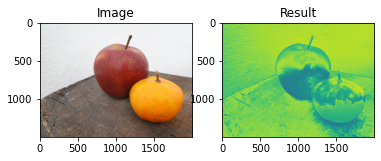

In [43]:
#third test image
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior
im = TestImgs[2]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK


likeApple_vectorised = mixGaussEst['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[0]],mixGaussEst['cov'][:,:,0]) + mixGaussEst['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[1]],mixGaussEst['cov'][:,:,1]);
 


likeNonApple_vectorised = mixGaussEst2['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[0]],mixGaussEst2['cov'][:,:,0]) + mixGaussEst2['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[1]],mixGaussEst2['cov'][:,:,1]);
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][2]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[2]],mixGaussEst2['cov'][:,:,2])
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][3]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[3]],mixGaussEst2['cov'][:,:,3])

posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))


# set up plots.
f, (ax1, ax3) = plt.subplots(1, 2)
#show the image
ax1.imshow(im)
ax1.set_title('Image')

#show our prediction!
ax3.imshow(posteriorApple)
ax3.set_title('Result')
plt.show()

As we can see the model is still really bad at recognising red apples and focuses on green apples. Also anything that is green in colour, gets labelled as an apple in the posterior. Furthermore, certain colours like white and brown also get mistakenly labelled as apples which I did not expect. I think there might have been some convergence issues in my run of the EM algorithm. I think the prevalence of green apples in the training data might have biased the model to heavily weight greenish colours.

D) For the test image with a ground-truth mask, quantify and report your result. Hint:
consider applying a range of thresholds to the posterior to produce sets of {True Positives
(TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)} and using an
ROC curve.

In [44]:
GT = (np.mean(BinTestImgs[0], axis=2)>0.5).astype(float) #ground truth
FPR = [] #false positive rate
TPR = [] #true positive rate
for threshold in [ 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    TP = np.sum(((posteriorApple>threshold)==1)*(GT==1)) #true positives
    TN = np.sum(((posteriorApple>threshold)==0)*(GT==0)) #true negatives
    FP = np.sum(((posteriorApple>threshold)==1)*(GT==0)) #false positives
    FN = np.sum(((posteriorApple>threshold)==0)*(GT==1)) #false negatives

    FPR.append(FP/(FP+TN))  
    TPR.append(TP/(FN+TP))

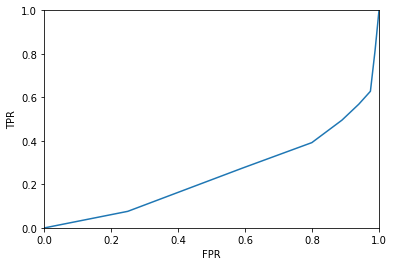

In [45]:
#roc curve
plt.plot(np.array(FPR), np.array(TPR))
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Looking at the poor performance on the ROC curve I can definitely tell there is a problem in my model and that it failed to converge to anything even remotely useful. The model performs worse than random guessing(line y=x in ROC graph).

E) Download or two non-copyrighted photos with apples (maybe
http://search.creativecommons.org/ or some other source of images that are not copyrighted).
Make good ground-truth masks for them. You can use Windows Paint, or more sophisticated
programs like Gimp (free). Use these as extra test-images. Report your qualitative and
quantitative results.

In [46]:
#more test images
files = glob.glob("hand_drawn/*.jpg")

MoreTestImgs = []

for myFile in files:
    im = plt.imread(myFile)
    MoreTestImgs.append(im/255) #rescaling rgb by 255

#binary masks
files = glob.glob("hand_drawn/*.png")
MoreBinTestImgs = []
for myFile in files:
    im = plt.imread(myFile)
    MoreBinTestImgs.append(im)

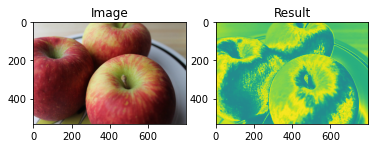

In [51]:
#extra test image
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior
im = MoreTestImgs[0]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK


likeApple_vectorised = mixGaussEst['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[0]],mixGaussEst['cov'][:,:,0]) + mixGaussEst['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[1]],mixGaussEst['cov'][:,:,1]);



likeNonApple_vectorised = mixGaussEst2['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[0]],mixGaussEst2['cov'][:,:,0]) + mixGaussEst2['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[1]],mixGaussEst2['cov'][:,:,1]);
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][2]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[2]],mixGaussEst2['cov'][:,:,2])
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][3]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[3]],mixGaussEst2['cov'][:,:,3])


posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))


# set up plots.
f, (ax1, ax3) = plt.subplots(1, 2)
#show the image
ax1.imshow(im)
ax1.set_title('Image')

#show our prediction!
ax3.imshow(posteriorApple)
ax3.set_title('Result')
plt.show()

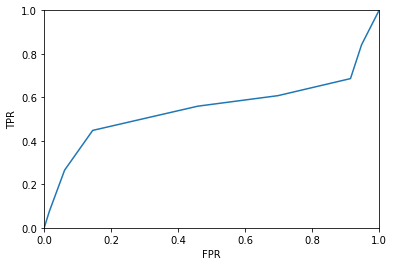

In [52]:
GT = (np.mean(MoreBinTestImgs[0], axis=2)>0.5).astype(float) #ground truth
FPR = [] #false positive rate
TPR = [] #true positive rate
for threshold in [ 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    TP = np.sum(((posteriorApple>threshold)==1)*(GT==1)) #true positives
    TN = np.sum(((posteriorApple>threshold)==0)*(GT==0)) #true negatives
    FP = np.sum(((posteriorApple>threshold)==1)*(GT==0)) #false positives
    FN = np.sum(((posteriorApple>threshold)==0)*(GT==1)) #false negatives

    FPR.append(FP/(FP+TN))  
    TPR.append(TP/(FN+TP))

#roc curve
plt.plot(np.array(FPR), np.array(TPR))
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

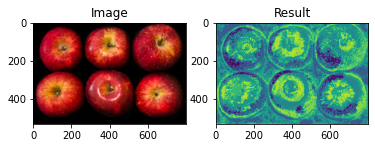

In [53]:
#another extra test image
#vectorised version
# let's define priors for whether the pixel is apple or non apple
priorApple = 0.5;
priorNonApple = 0.5;

# now run through the pixels in the image and classify them as being apple or
# non apple - we will fill in the posterior
im = MoreTestImgs[1]
imY, imX, imZ = im.shape
posteriorApple = np.zeros([imY,imX])
vectorised_pixel_rgb_triplets = np.transpose(im.reshape(-1, im.shape[-1])) #flattens the DxKx3 matrix into 3xDK


likeApple_vectorised = mixGaussEst['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[0]],mixGaussEst['cov'][:,:,0]) + mixGaussEst['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[1]],mixGaussEst['cov'][:,:,1]);
#likeApple_vectorised = likeApple_vectorised + mixGaussEst['weight'][2]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst['mean'][:,[2]],mixGaussEst['cov'][:,:,2]) 


likeNonApple_vectorised = mixGaussEst2['weight'][0]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[0]],mixGaussEst2['cov'][:,:,0]) + mixGaussEst2['weight'][1]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[1]],mixGaussEst2['cov'][:,:,1]);
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][2]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[2]],mixGaussEst2['cov'][:,:,2])
likeNonApple_vectorised = likeNonApple_vectorised + mixGaussEst2['weight'][3]*calcGaussianProb(vectorised_pixel_rgb_triplets,mixGaussEst2['mean'][:,[3]],mixGaussEst2['cov'][:,:,3])


posteriorApple_vectorised = (priorApple*likeApple_vectorised)/(priorApple*likeApple_vectorised + priorNonApple*likeNonApple_vectorised)
posteriorApple = np.reshape(posteriorApple_vectorised, (imY,imX))


# set up plots.
f, (ax1, ax3) = plt.subplots(1, 2)
#show the image
ax1.imshow(im)
ax1.set_title('Image')

#show our prediction!
ax3.imshow(posteriorApple)
ax3.set_title('Result')
plt.show()

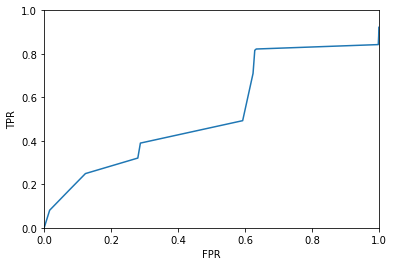

In [54]:
GT = (np.mean(MoreBinTestImgs[1], axis=2)>0.5).astype(float) #ground truth
FPR = [] #false positive rate
TPR = [] #true positive rate
for threshold in [ 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    TP = np.sum(((posteriorApple>threshold)==1)*(GT==1)) #true positives
    TN = np.sum(((posteriorApple>threshold)==0)*(GT==0)) #true negatives
    FP = np.sum(((posteriorApple>threshold)==1)*(GT==0)) #false positives
    FN = np.sum(((posteriorApple>threshold)==0)*(GT==1)) #false negatives

    FPR.append(FP/(FP+TN))  
    TPR.append(TP/(FN+TP))

#roc curve
plt.plot(np.array(FPR), np.array(TPR))
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Qualitative comment: The model seems to detect the red apples in the first extra image better than it does in the second extra image. Looking at the last two ROC curves, we can see that as FPR increases in the first extra image the model performs decently up to a certain point after which it is poor. Lookign at the ROC curve of the second image, we see that the model performs better than random guessing at certain part in the curve but most of the time it performs worse than just guessing.

F) We should really be using three separate sets of files: a training set, a validation set, and a
test set! Explain why.

We need the training set to train our model on when finding the Gaussian component parameters however there are some hyperparameters involved. For example, how do we decide how many gaussian compoents k to estimate for our data or how many ieterations to run the algorithm for. This is why we need a validation set, on which we can trial different values of k and then choose the best performing one. We then train our model on the training set with the optimal k and then test how well it performs on unseen data using the test set.